In [175]:
!pip install git+https://github.com/ranaroussi/yfinance.git@hotfix/decryption

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

msft = yf.Ticker("MSFT")
msft.info


  Cloning https://github.com/ranaroussi/yfinance.git (to revision hotfix/decryption) to c:\users\marcoaurelionajarost\appdata\local\temp\pip-req-build-p81pjmbe


  Running command git clone --filter=blob:none --quiet https://github.com/ranaroussi/yfinance.git 'C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\pip-req-build-p81pjmbe'
  Running command git checkout -q hotfix/decryption
  error: pathspec 'hotfix/decryption' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  git checkout -q hotfix/decryption did not run successfully.
  exit code: 1
  
  See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git checkout -q hotfix/decryption did not run successfully.
exit code: 1

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


HTTPError: 401 Client Error: Unauthorized for url: https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&lang=en-US&symbols=MSFT

In [154]:
#tickers=["BCRI11", "BDIF11", "BTAL11", "BTRA11", "FGAA11", "GALG11", "HGRU11", "HSAF11", "HSLG11", "HSML11", "IFRA11", 
          #"KDIF11", "KNCA11", "KNCR11", "KNRI11", "MAXR11", "PATL11", "RURA11", "RZAG11", "VGIA11", "VISC11",
        #"XPCA11", "XPID11", "XPML11"]
tickers=["BCRI11", "BDIF11", "BTAL11", "BTRA11", "FGAA11", "GALG11", "HGRU11", "HSAF11", "HSLG11", "HSML11", "IFRA11",
         "KNCA11","KNCR11", "KNRI11", "MAXR11", "PATL11", "RURA11", "RZAG11", "VGIA11", "VISC11","XPCA11", "XPID11", 
         "XPML11", "XPIN11", "MGLU3"]
tickers=[t + ".SA" for t in tickers]
ativos = yf.download(tickers, start="2018-01-01")['Adj Close'].dropna()
ativos.tail()

[*********************100%***********************]  25 of 25 completed


,BCRI11.SA,BDIF11.SA,BTAL11.SA,BTRA11.SA,FGAA11.SA,GALG11.SA,HGRU11.SA,HSAF11.SA,HSLG11.SA,HSML11.SA,...,MGLU3.SA,PATL11.SA,RURA11.SA,RZAG11.SA,VGIA11.SA,VISC11.SA,XPCA11.SA,XPID11.SA,XPIN11.SA,XPML11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-25,70.059998,93.239998,86.910004,68.029999,10.06,9.15,138.500000,86.839996,96.500000,94.610001,...,2.15,70.690002,10.55,9.72,9.19,120.910004,9.68,89.779999,83.989998,110.800003
2023-09-26,69.699997,92.769997,86.839996,66.199997,10.04,9.16,136.000000,85.120003,95.449997,94.220001,...,2.10,70.989998,10.50,9.75,9.26,119.050003,9.71,89.000000,84.410004,110.000000
2023-09-27,69.599998,91.800003,85.010002,65.360001,10.07,9.19,135.889999,85.440002,94.879997,93.269997,...,2.04,70.699997,10.56,9.70,9.23,119.000000,9.79,89.010002,84.540001,110.320000
2023-09-28,69.889999,92.019997,85.510002,65.660004,10.06,9.20,136.800003,86.129997,95.349998,93.800003,...,2.05,72.949997,10.50,9.77,9.28,118.699997,9.80,89.010002,84.019997,109.739998
2023-09-29,70.870003,92.500000,86.400002,66.190002,10.07,9.30,138.500000,85.099998,96.500000,93.820000,...,2.12,73.169998,10.57,9.82,9.37,118.750000,9.92,89.510002,86.000000,110.739998


<Axes: xlabel='Date'>

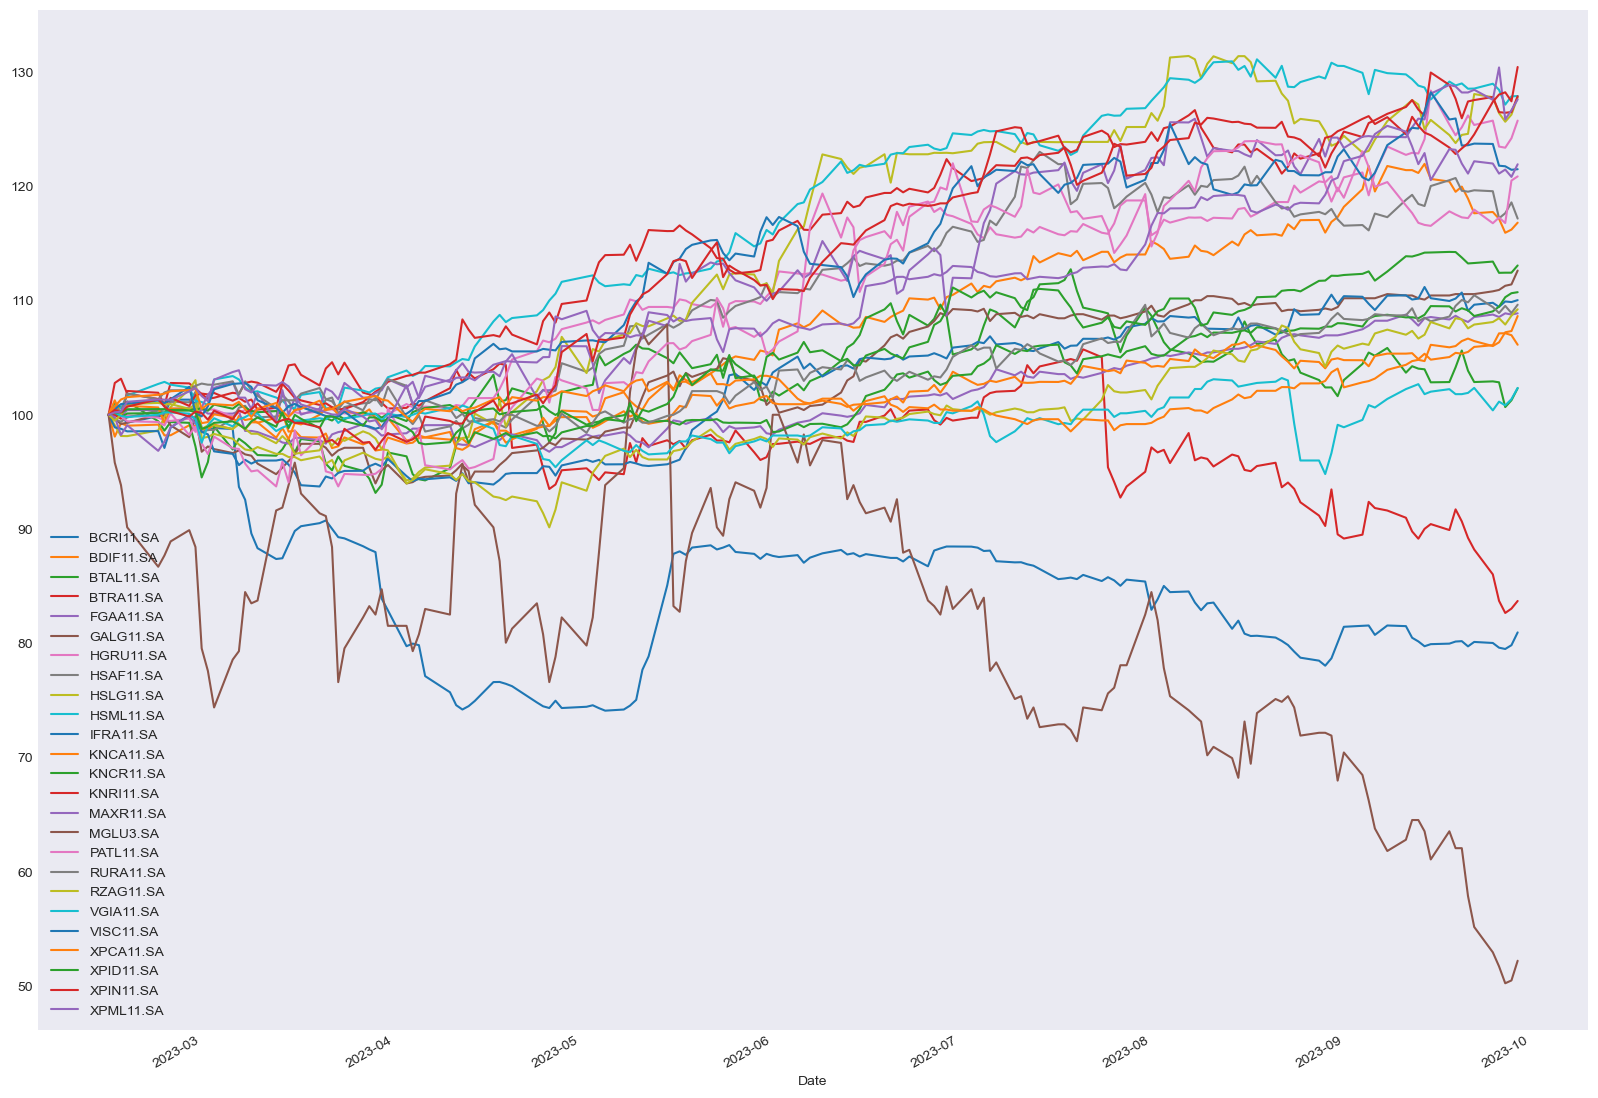

In [155]:
(ativos / ativos.iloc[0] * 100).plot(figsize=(20,15))

In [156]:
retorno_diario = ativos.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [157]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

In [158]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

In [159]:
# vamos usar uma simulação aleatória
numero_acoes = len(tickers)
numero_carteiras = 100000

np.random.seed(101)

In [160]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

In [161]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(ativos):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in ativos]
df = df[colunas]

C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\ipykernel_55492\3475351794.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


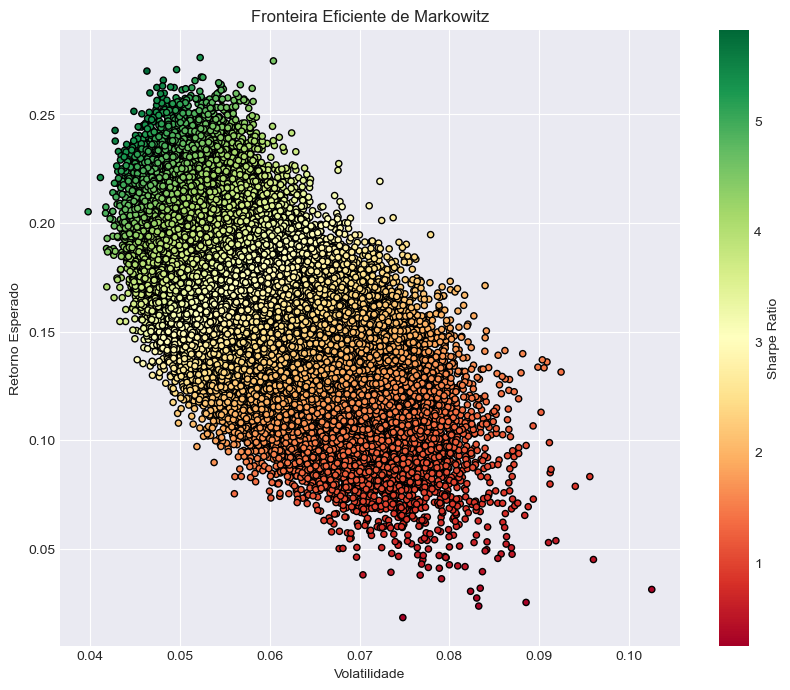

In [162]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [163]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\ipykernel_55492\3074554039.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


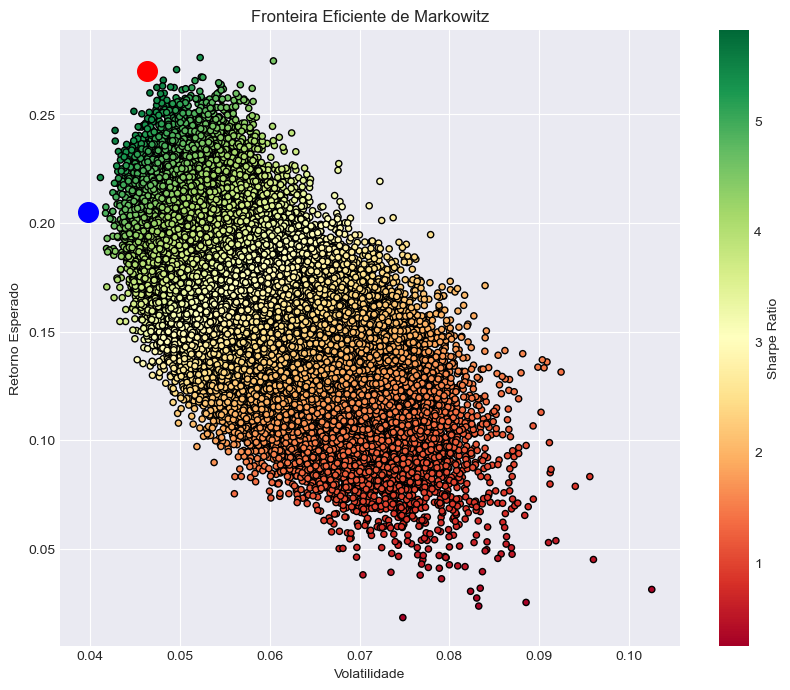

In [164]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [165]:
print("Essa é a carteira de Mínima Variância:")
print(carteira_min_variancia.T*100)
print()
print("Essa é a carteira com maior Sharpe Ratio:")
print(carteira_sharpe.T*100)

Essa é a carteira de Mínima Variância:
                     56221
Retorno          20.516600
Volatilidade      3.977910
Sharpe Ratio    515.763285
BCRI11.SA Peso    2.638860
BDIF11.SA Peso    4.248376
BTAL11.SA Peso    0.996843
BTRA11.SA Peso    0.233043
FGAA11.SA Peso    7.043004
GALG11.SA Peso   10.372131
HGRU11.SA Peso    9.604761
HSAF11.SA Peso    3.312690
HSLG11.SA Peso    1.753582
HSML11.SA Peso    5.068554
IFRA11.SA Peso    6.840760
KNCA11.SA Peso    0.176022
KNCR11.SA Peso    8.752875
KNRI11.SA Peso    0.056156
MAXR11.SA Peso    2.683949
MGLU3.SA Peso     0.450348
PATL11.SA Peso    2.147383
RURA11.SA Peso    4.243945
RZAG11.SA Peso    2.417898
VGIA11.SA Peso    8.347572
VISC11.SA Peso    1.389418
XPCA11.SA Peso    5.767624
XPID11.SA Peso    3.729218
XPIN11.SA Peso    1.314597
XPML11.SA Peso    6.410390

Essa é a carteira com maior Sharpe Ratio:
                     24428
Retorno          26.993020
Volatilidade      4.632621
Sharpe Ratio    582.672769
BCRI11.SA Peso    0.027995
